In [88]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import rankdata, spearmanr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [90]:
out_dirs = [Path(dirname) for dirname in ["heatmap_run1", "heatmap_run2", "heatmap_run3", "heatmap_run4", "heatmap_run5"]]
reps = ["fairseq.wmt14.en-fr.fconv", "skipthought"]
np.random.shuffle(reps)

rep1, rep2 = reps
names = ["rep", "idx", "dist", "sent1", "sent2"]

dists = []
for out_dir in out_dirs:
    try:
        dists_i = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep1, rep2)), header=None, names=names)
    except FileNotFoundError:
        dists_i = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep2, rep1)), header=None, names=names)
        
    dists_i = dists_i.reset_index().set_index(["rep", "sent1", "sent2"]).sort_index()
    dists.append(dists_i)
    
dists = sum(dists) / len(dists)

In [91]:
dists.head()

index  \
rep                                    sent1                                              sent2                                                          
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   73602.6   
                                                                                          A bed is a piece of furniture used as a place t...  140296.8   
                                                                                          A bed is made of a mattress and a box spring, p...   82956.4   
                                                                                          A bee is a flying insect, with a black and yell...   91763.8   
                                                                                          A bicycle is a vehicle with two wheels and peda...   78629.6   

                                                                                                                                                  idx  \
rep                                    sent1                                              sent2                                                         
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...     66.6   
                                                                                          A bed is a piece of furniture used as a place t...  66760.8   
                                                                                          A bed is made of a mattress and a box spring, p...   9420.4   
                                                                                          A bee is a flying insect, with a black and yell...  18227.8   
                                                                                          A bicycle is a vehicle with two wheels and peda...   5093.6   

                                                                                                                                                  dist  
rep                                    sent1                                              sent2                                                         
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.493461  
                                                                                          A bed is a piece of furniture used as a place t...  1.057154  
                                                                                          A bed is made of a mattress and a box spring, p...  0.962816  
                                                                                          A bee is a flying insect, with a black and yell...  0.959213  
                                                                                          A bicycle is a vehicle with two wheels and peda...  0.941865

In [92]:
pair_dists_rep1 = dists.loc["384sentences.%s" % rep1].dist
pair_dists_rep2 = dists.loc["384sentences.%s" % rep2].dist

In [93]:
pair_dists_rep1.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.       0.468358
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.            1.003322
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.    0.900890
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              0.802326
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     1.021152
Name: dist, dtyp

In [94]:
spearmanr(pair_dists_rep1, pair_dists_rep2)

SpearmanrResult(correlation=0.31482708653803421, pvalue=0.0)

Let's create and analyze rank data for the pairwise distance measures. Here a low pairwise rank = low pairwise distance = high pairwise similarity.

In [95]:
rep1_ranks = rankdata(pair_dists_rep1)
rep2_ranks = rankdata(pair_dists_rep2)

In [96]:
list(zip(rep1_ranks, rep2_ranks))[:20]

[(175.0, 62.0),
 (31846.0, 69396.0),
 (10385.0, 8135.0),
 (3491.0, 6987.0),
 (37605.0, 3652.0),
 (30258.0, 7849.0),
 (39423.0, 69078.0),
 (56497.0, 63414.0),
 (6501.0, 4752.0),
 (25780.0, 24599.0),
 (18421.0, 46209.0),
 (5337.0, 13543.0),
 (52071.0, 72392.0),
 (34284.0, 27822.0),
 (6111.0, 1509.0),
 (12821.0, 602.0),
 (6670.0, 20263.0),
 (39646.0, 12544.0),
 (21629.0, 59107.0),
 (62070.0, 9583.0)]

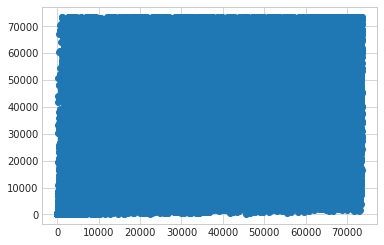

In [97]:
plt.scatter(rep1_ranks, rep2_ranks)

In [98]:
# Add rank information to main dataframe.
dists.loc[("384sentences.%s" % rep1, slice(None), slice(None)), "dist_rank"] = rep1_ranks
dists.loc[("384sentences.%s" % rep2, slice(None), slice(None)), "dist_rank"] = rep2_ranks
dists.head()

index  \
rep                                    sent1                                              sent2                                                          
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   73602.6   
                                                                                          A bed is a piece of furniture used as a place t...  140296.8   
                                                                                          A bed is made of a mattress and a box spring, p...   82956.4   
                                                                                          A bee is a flying insect, with a black and yell...   91763.8   
                                                                                          A bicycle is a vehicle with two wheels and peda...   78629.6   

                                                                                                                                                  idx  \
rep                                    sent1                                              sent2                                                         
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...     66.6   
                                                                                          A bed is a piece of furniture used as a place t...  66760.8   
                                                                                          A bed is made of a mattress and a box spring, p...   9420.4   
                                                                                          A bee is a flying insect, with a black and yell...  18227.8   
                                                                                          A bicycle is a vehicle with two wheels and peda...   5093.6   

                                                                                                                                                  dist  \
rep                                    sent1                                              sent2                                                          
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.493461   
                                                                                          A bed is a piece of furniture used as a place t...  1.057154   
                                                                                          A bed is made of a mattress and a box spring, p...  0.962816   
                                                                                          A bee is a flying insect, with a black and yell...  0.959213   
                                                                                          A bicycle is a vehicle with two wheels and peda...  0.941865   

                                                                                                                                              dist_rank  
rep                                    sent1                                              sent2                                                          
384sentences.fairseq.wmt14.en-fr.fconv A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...       62.0  
                                                                                          A bed is a piece of furniture used as a place t...    69396.0  
                                                                                          A bed is made of a mattress and a box spring, p...     8135.0  
                                                                                          A bee is a flying insect, with a black and yell...     

## Rank differences

Let's compare differences in the ranks of sentence pair distances, arbitrarily taking the difference `rep1_rank - rep2_rank`. Highly negative values indicate that `rep1` ranks the pair far lower distance (higher similarity) than `rep2`.

In [99]:
dist_rank_differences = dists.loc["384sentences.%s" % rep1].dist_rank - dists.loc["384sentences.%s" % rep2].dist_rank
dist_rank_differences.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.         113.0
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.           -37550.0
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.     2250.0
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              -3496.0
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     33953.0
Name: dist_rank, dtyp

Let's look at the extremes of the rank difference series. Extremely negative sentence pairs here are those scored highly similar by `rep1` relative to `rep2`.

In [100]:
dist_rank_differences.sort_values()

sent1                                                                                 sent2                                                                              
Broccoli is a plant in the cabbage family.                                            Lentils are cooked by boiling and are a great source of protein.                      -72294.0
Lettuce can be eaten cold and raw, in salads and other dishes, or cooked.             Salmon is the most common farmed fish, though it can also be caught in the wild.      -72290.0
A boy is a young male child who has not undergone puberty.                            A woman is stereotypically seen as a caregiver.                                       -72038.0
A banana is a long fruit that grows in bunchs, with a soft edible inside.             Peaches are sweet and delicate, and must be harvested after ripening.                 -71003.0
A shoe is clothing for the foot, with a sole, an outsole and a heel.                  A sweater that opens

After blind reviewing above, reveal the identities of rep1 and rep2 below....

t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t

In [101]:
rep1

'skipthought'

In [102]:
rep2

'fairseq.wmt14.en-fr.fconv'